SOM IS AN UNSUPERVISED DEEP LEARNING MODEL

Dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.

This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3.

A1: 0,1 CATEGORICAL (formerly: a,b)

A2: continuous.

A3: continuous.

A4: 1,2,3 CATEGORICAL (formerly: p,g,gg)

A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)

A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)

A7: continuous.

A8: 1, 0 CATEGORICAL (formerly: t, f)

A9: 1, 0 CATEGORICAL (formerly: t, f)

A10: continuous.

A11: 1, 0 CATEGORICAL (formerly t, f)

A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p)

A13: continuous.

A14: continuous.

A15/class: 1,2 class attribute (formerly: +,-) or (1: Approved or 0: Not Approved)

In [27]:
!pip install MiniSom

Importing MiniSom library

In [28]:
from minisom import MiniSom

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dataset=pd.read_csv("Credit_Card_Applications.csv")
dataset.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [31]:
X=dataset.iloc[:,0:-1].values
Y=dataset.iloc[:,-1].values

Data Normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)

In [33]:
print(X)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [34]:
print(X_scaled)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


SOM initializaton and training

In [35]:
n_neuron=10
m_neuron=10
# input_len=number of features or, number of columuns(excluding target)
som=MiniSom(n_neuron, m_neuron, input_len=X_scaled.shape[1], sigma=1, 
            learning_rate=0.5, neighborhood_function='gaussian')
som.random_weights_init(X_scaled)
som.train(X_scaled, 100)

In [36]:
distances=som.distance_map()
#win_map diye kono ekta winning node kon kon sample er jonne hoiche seta bujhaay
mappings=som.win_map(X_scaled,return_indices=True)
#mappings holo ekta dictionary type er container
count=0
for i in mappings:
    print("for coordinate no. ", i)
    print("It is the winning node for sample no. :")
    for j in mappings.get(i):
        print(j)
        count=count+1
print(mappings)
print(count)

for coordinate no.  (9, 3)
It is the winning node for sample no. :
0
238
250
268
280
301
326
351
500
541
620
623
652
for coordinate no.  (2, 5)
It is the winning node for sample no. :
1
20
63
82
96
100
122
131
135
237
289
306
318
394
400
407
411
418
477
519
531
540
552
600
672
683
for coordinate no.  (3, 7)
It is the winning node for sample no. :
2
66
176
177
188
214
262
327
334
365
386
397
428
498
527
548
560
573
608
655
661
668
for coordinate no.  (7, 5)
It is the winning node for sample no. :
3
171
345
for coordinate no.  (5, 1)
It is the winning node for sample no. :
4
65
93
119
137
178
195
325
343
408
503
524
533
539
561
610
614
615
619
649
684
for coordinate no.  (1, 3)
It is the winning node for sample no. :
5
7
149
204
215
313
430
578
for coordinate no.  (4, 4)
It is the winning node for sample no. :
6
92
107
218
303
354
for coordinate no.  (7, 1)
It is the winning node for sample no. :
8
51
244
424
584
for coordinate no.  (4, 1)
It is the winning node for sample no. :
9
38
39


Visualization


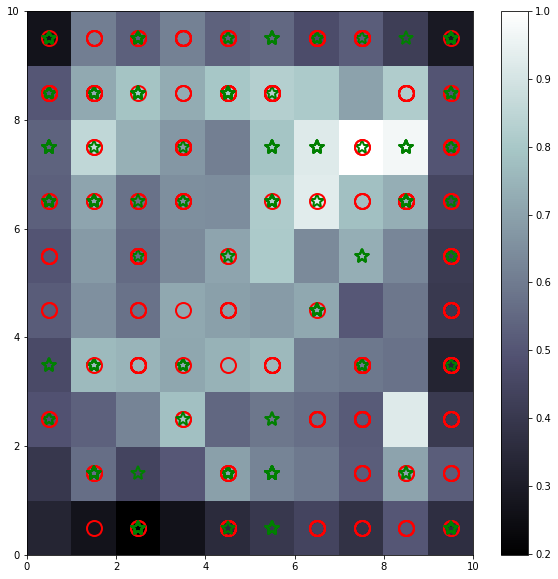

In [37]:
#originally:
#red= 0 means NOT Approved by the bank
#green= 1 means Approved by the bank

#in color graph:
#white=fraud cluster
#black=good cluster
%matplotlib inline
plt.figure(figsize=(10,10))
plt.pcolor(som.distance_map().T, cmap='bone')
plt.colorbar()

markers=['o','*']
colors=['r','g']
for i, xx in enumerate(X_scaled):
    w=som.winner(xx)
    plt.plot(w[0]+0.5,w[1]+0.5,markers[Y[i]],markerfacecolor='None',
             markeredgecolor=colors[Y[i]],markersize=15,markeredgewidth=2)
plt.show()

#decision:
#black+red--> Bank did NOT approve a good people
#black+green-->Bank approved a good people
#white+green--> Bank approved a FRAUD people
#white+red--> Bank did not approve a FRAUD people

Detecting obvious frauds

In [50]:
#at that time coordinates (1,6),(1,7),(1,8) were more white-ish, so they are the obvious frauds
frauds=np.concatenate((mappings.get((7,7)),mappings.get((8,7)),mappings.get((6,6)), mappings.get((6,7))),axis=0)
for i in frauds:
    print(int(X[i,0]))

15590234
15673238
15660871
15795079
15746258
15773776
15778345
15791769
15776494
15699963
15667588
15577515
15705343
15624595
15720644
15671987
15700511


Predicting the probability for being fraud of any customer using SUPERVISED Deep Lesarning Model

In [85]:
#input feature matrix
X_train=dataset.iloc[:,1:].values
scaler2=MinMaxScaler()
X_train=scaler2.fit_transform(X_train)
Y_train=np.zeros(len(X))
#generating output depended variable
for cnt, i in enumerate(X):
    for j in frauds:
        #print(cnt," ohho ", j)
        if int(cnt)==int(j):
            Y_train[cnt]=1
            break
        else:
            Y_train[cnt]=0
        

In [79]:
np.shape(X_train)

(690, 15)

In [86]:
print(len(Y_train))
print(Y_train)

690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Building ANN model

In [87]:
import tensorflow as tf

In [91]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(15,)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
model.fit(x=X_train, y=Y_train, batch_size=1, epochs=5)
model.evaluate(x=X_train, y=Y_train, batch_size=1)

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1490 - accuracy: 0.9652
Epoch 2/5
690/690 [==============================] - 1s 2ms/step - loss: 0.0876 - accuracy: 0.9754
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0802 - accuracy: 0.9754
Epoch 4/5
690/690 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9754
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0605 - accuracy: 0.9841


[0.06046903878450394, 0.9840579628944397]

In [97]:
from sklearn.metrics import accuracy_score 
Y_predict=model.predict(X_train)
#print(Y_predict)

Ranking the customers according to their fraud probability 

In [98]:
Y_predict=np.concatenate((X[:,0:1],Y_predict[:,0:1]),axis=1)

In [99]:
print(Y_predict)

[[1.57761560e+07 4.51245904e-03]
 [1.57395480e+07 5.53524494e-03]
 [1.56628540e+07 2.49527991e-02]
 ...
 [1.56754500e+07 4.39962745e-02]
 [1.57764940e+07 5.87466538e-01]
 [1.55924120e+07 1.03832185e-02]]


In [100]:
Y_predict=Y_predict[Y_predict[:,1].argsort()]

In [101]:
print(Y_predict)

[[1.56214230e+07 1.60753727e-04]
 [1.56444000e+07 2.29805708e-04]
 [1.57901130e+07 2.35348940e-04]
 ...
 [1.57005110e+07 6.18339002e-01]
 [1.56245950e+07 6.47735059e-01]
 [1.57206440e+07 6.61135077e-01]]
